In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = 12, 12

In [111]:
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-305.  -435.    85.5    5.     5.    85.5]
 [-295.  -435.    85.5    5.     5.    85.5]
 [-285.  -435.    85.5    5.     5.    85.5]
 ...
 [ 435.   465.     8.     5.     5.     8. ]
 [ 445.   465.     8.     5.     5.     8. ]
 [ 455.   465.     8.     5.     5.     8. ]]


In [51]:
def create_grid1(data, drone_altitude, safety_distance):
    """
    Returns a grid representation of a 2D configuration space
    based on given obstacle data, drone altitude and safety distance
    arguments.
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.min(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.max(data[:, 0] + data[:, 3]))
    print(north_min, north_max)

    # minimum and maximum east coordinates
    east_min = np.floor(np.min(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.max(data[:, 1] + data[:, 4]))
    print(east_min, east_max)
    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil((north_max - north_min)))
    east_size = int(np.ceil((east_max - east_min)))
    print(north_size, east_size)
    # Initialize an empty grid
    grid = np.zeros((north_size, east_size))
    # Center offset for grid
    north_min_center = np.min(data[:, 0])
    east_min_center = np.min(data[:, 1])
    # Populate the grid with obstacles
    for i in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[i, :]

        if alt + d_alt + safety_distance > drone_altitude:
            obstacle = [
                int(north - d_north - safety_distance - north_min_center),
                int(north + d_north + safety_distance - north_min_center),
                int(east - d_east - safety_distance - east_min_center),
                int(east + d_east + safety_distance - east_min_center),
#                 int(north - d_north - safety_distance - north_min),
#                 int(north + d_north + safety_distance - north_min),
#                 int(east - d_east - safety_distance - east_min),
#                 int(east + d_east + safety_distance - east_min),
            ]
            grid[obstacle[0]:obstacle[1], obstacle[2]:obstacle[3]] = 1

    return grid

In [27]:
def extract_polygons(data):

    polygons = []
    points   = []
    
    for i in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[i, :]
        
        p1 = (north - d_north, east - d_east)
        p2 = (north + d_north, east - d_east)
        p3 = (north + d_north, east + d_east)
        p4 = (north - d_north, east + d_east)
        
        corners = [p1, p2, p3, p4]
        polygons.append(corners)
        points.append([north, east])
    return polygons, points

In [115]:
polygons, points = extract_polygons(data)

In [45]:
grid1 = create_grid1(data, 0, 0)

-310.0 500.0
-440.0 470.0
810 910


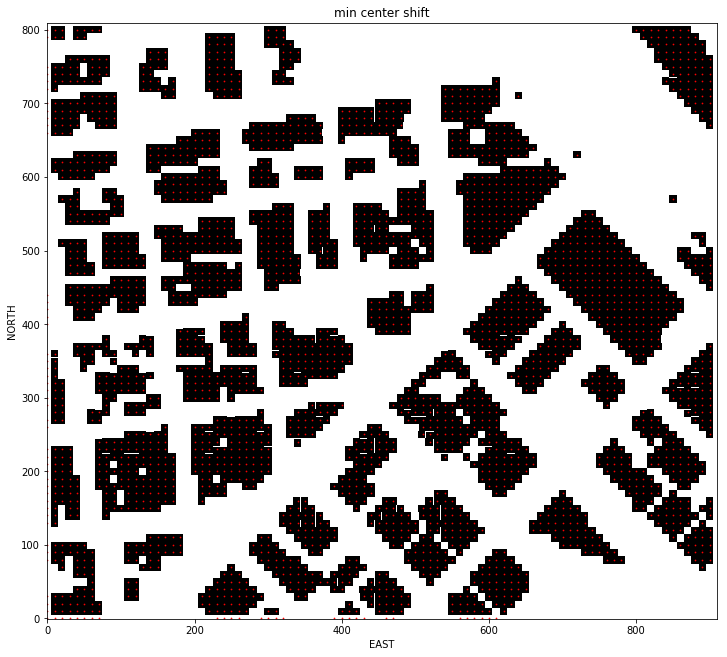

In [193]:
plt.imshow(grid1, cmap='Greys', origin='lower')

nmin = np.min(data[:, 0])
emin = np.min(data[:, 1])

# nmin = np.floor(np.min(data[:, 0] - data[:, 3]))
# emin = np.floor(np.min(data[:, 1] - data[:, 4]))

# draw points
plt.scatter(np.array(points)[:,1] - emin,  np.array(points)[:,0] - nmin, c='red', s=.5)

plt.ylabel('NORTH')
plt.xlabel('EAST')
plt.title('min center shift')

plt.show()

In [186]:
def create_grid2(data, drone_altitude, safety_distance):
    """
    Returns a grid representation of a 2D configuration space
    based on given obstacle data, drone altitude and safety distance
    arguments.
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.min(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.max(data[:, 0] + data[:, 3]))
    print(north_min, north_max)

    # minimum and maximum east coordinates
    east_min = np.floor(np.min(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.max(data[:, 1] + data[:, 4]))
    print(east_min, east_max)
    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil((north_max - north_min)))
    east_size = int(np.ceil((east_max - east_min)))
    print(north_size, east_size)
    # Initialize an empty grid
    grid = np.zeros((north_size, east_size))
    # Center offset for grid
    north_min_center = np.min(data[:, 0])
    east_min_center = np.min(data[:, 1])
    # Populate the grid with obstacles
    for i in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[i, :]

        if alt + d_alt + safety_distance > drone_altitude:
            obstacle = [
#                 int(north - d_north - safety_distance - north_min_center),
#                 int(north + d_north + safety_distance - north_min_center),
#                 int(east - d_east - safety_distance - east_min_center),
#                 int(east + d_east + safety_distance - east_min_center),
#                 int(north - d_north - safety_distance - north_min),
#                 int(north + d_north + safety_distance - north_min),
#                 int(east - d_east - safety_distance - east_min),
#                 int(east + d_east + safety_distance - east_min),
                int(np.clip(north - d_north - safety_distance - north_min, 0, north_size-1)),
                int(np.clip(north + d_north + safety_distance - north_min, 0, north_size-1)),
                int(np.clip(east - d_east - safety_distance - east_min, 0, east_size-1)),
                int(np.clip(east + d_east + safety_distance - east_min, 0, east_size-1)),
            ]
            grid[obstacle[0]:obstacle[1], obstacle[2]:obstacle[3]] = 1

    return grid

In [241]:
def create_grid3(data, drone_altitude, safety_distance):
    """
    Returns a grid representation of a 2D configuration space
    based on given obstacle data, drone altitude and safety distance
    arguments.
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.min(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.max(data[:, 0] + data[:, 3]))
    print(north_min, north_max)

    # minimum and maximum east coordinates
    east_min = np.floor(np.min(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.max(data[:, 1] + data[:, 4]))
    print(east_min, east_max)
    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil((north_max - north_min + 1)))
    east_size = int(np.ceil((east_max - east_min + 1)))
    print(north_size, east_size)
    # Initialize an empty grid
    grid = np.zeros((north_size, east_size))
    # Center offset for grid
    north_min_center = np.min(data[:, 0])
    east_min_center = np.min(data[:, 1])
    # Populate the grid with obstacles
    for i in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[i, :]

        if alt + d_alt + safety_distance > drone_altitude:
            obstacle = [
                int(np.clip(north - d_north - safety_distance - north_min, 0, north_size-1)),
                int(np.clip(north + d_north + safety_distance - north_min, 0, north_size-1)),
                int(np.clip(east - d_east - safety_distance - east_min, 0, east_size-1)),
                int(np.clip(east + d_east + safety_distance - east_min, 0, east_size-1)),
            ]
            grid[obstacle[0]:obstacle[1]+1, obstacle[2]:obstacle[3]+1] = 1

    return grid

-310.0 500.0
-440.0 470.0
810 910


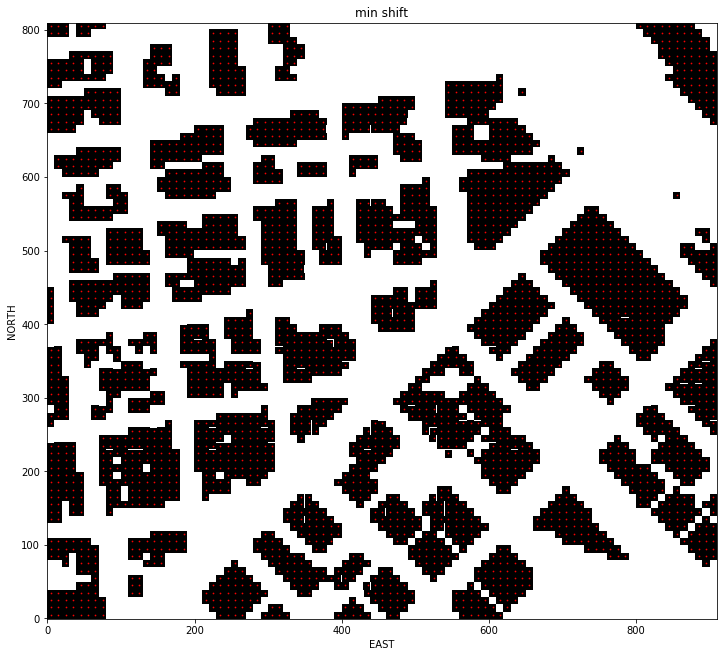

In [87]:
grid2 = create_grid2(data, 0, 0)
plt.imshow(grid2, cmap='Greys', origin='lower')

# nmin = np.min(data[:, 0])
# emin = np.min(data[:, 1])

nmin = np.floor(np.min(data[:, 0] - data[:, 3]))
emin = np.floor(np.min(data[:, 1] - data[:, 4]))

# draw points
plt.scatter(np.array(points)[:,1] - emin,  np.array(points)[:,0] - nmin, c='red', s=.5)

plt.ylabel('NORTH')
plt.xlabel('EAST')
plt.title('min shift')

plt.show()

-310.0 500.0
-440.0 470.0
810 910
-310.0 500.0
-440.0 470.0
810 910
nmin =  -310.0
5.0


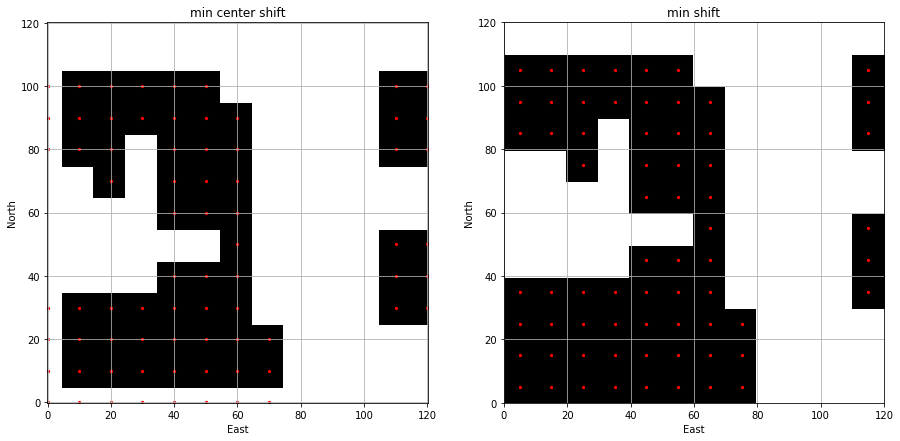

In [90]:
grid1 = create_grid1(data, 0, 0)
grid2 = create_grid2(data, 0, 0)

nmin = np.min(data[:, 0])
emin = np.min(data[:, 1])

fig, ax = plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(grid1, cmap='Greys', origin='lower')
ax[0].scatter(np.array(points)[:,1] - emin,  np.array(points)[:,0] - nmin, c='red', s=5)
ax[0].set_title('min center shift')
ax[0].set_ylabel('North')
ax[0].set_xlabel('East')
ax[0].set_xlim(-0.1,120.1)
ax[0].set_ylim(-0.1,120.1)
ax[0].grid(which='both')


nmin = np.floor(np.min(data[:, 0] - data[:, 3]))
emin = np.floor(np.min(data[:, 1] - data[:, 4]))
print("nmin = ", nmin)
print(np.min(np.array(points)[:,1]- emin) )

ax[1].imshow(grid2, cmap='Greys', origin='lower')
ax[1].scatter(np.array(points)[:,1] - emin,  np.array(points)[:,0] - nmin, c='red', s=5)
ax[1].set_title('min shift')
ax[1].set_ylabel('North')
ax[1].set_xlabel('East')
ax[1].set_xlim(0,120)
ax[1].set_ylim(0,120)
ax[1].grid(which='both')

plt.show()

In [98]:
a = np.array([1,2,3,4,5,6,7,8,9,10])
a[-5:5]

array([], dtype=int64)

In [177]:
grid2 = create_grid2(data, 0, 4)

-310.0 500.0
-440.0 470.0
811 911


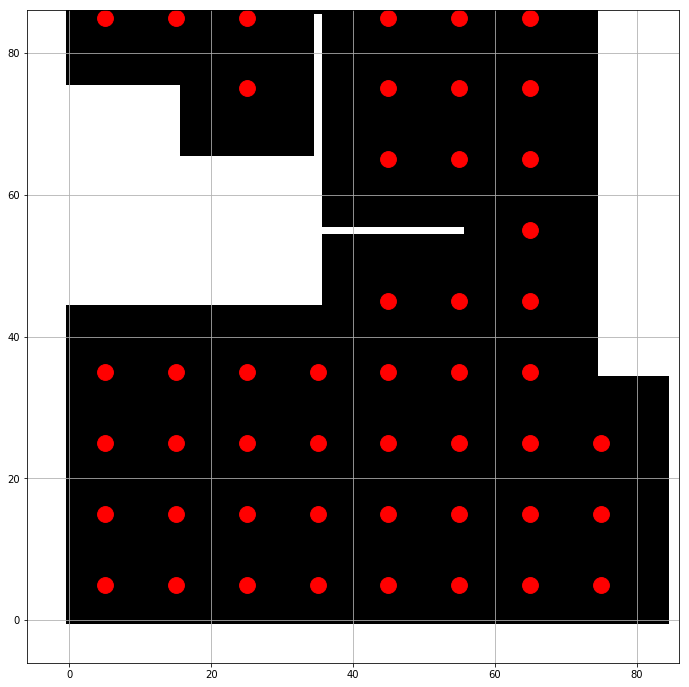

In [178]:
nmin = np.floor(np.min(data[:, 0] - data[:, 3]))
emin = np.floor(np.min(data[:, 1] - data[:, 4]))

plt.imshow(grid2, cmap='Greys', origin='lower')
plt.scatter(np.array(points)[:,1] - emin,  np.array(points)[:,0] - nmin, c='red', s=250)
plt.xlim(-6,86)
plt.ylim(-6,86)

plt.grid(which='both')

plt.show()

-310.0 500.0
-440.0 470.0
810 910


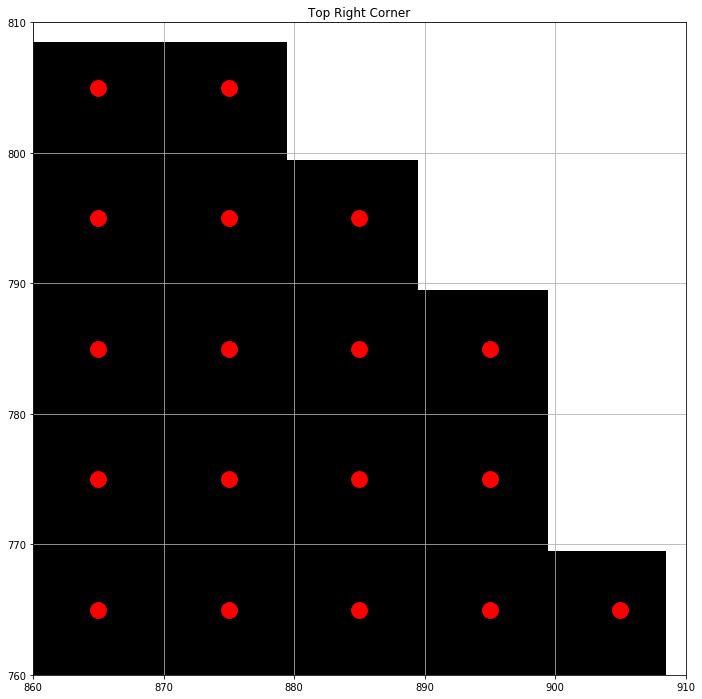

In [194]:
grid2 = create_grid2(data, 0, 0)

nmin = np.floor(np.min(data[:, 0] - data[:, 3]))
emin = np.floor(np.min(data[:, 1] - data[:, 4]))

plt.imshow(grid2, cmap='Greys', origin='lower')
plt.scatter(np.array(points)[:,1] - emin,  np.array(points)[:,0] - nmin, c='red', s=250)
plt.title('Top Right Corner')
plt.xlim(grid.shape[1]-50,grid.shape[1])
plt.ylim(grid.shape[0]-50,grid.shape[0])
plt.grid(which='both')

plt.show()

-310.0 500.0
-440.0 470.0
810 910
-310.0 500.0
-440.0 470.0
811 911


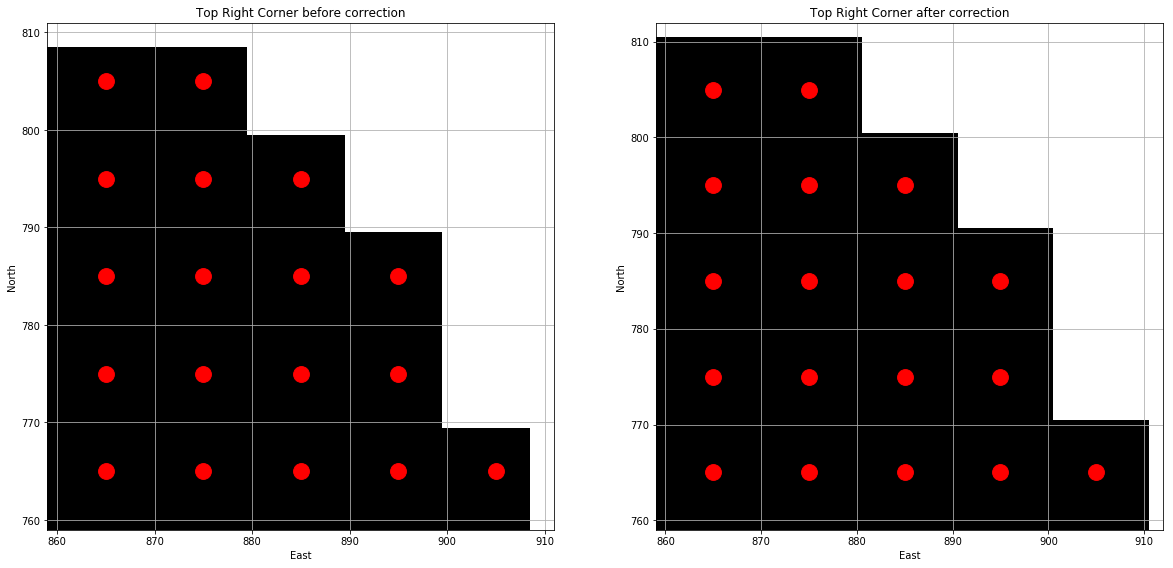

In [243]:
grid2 = create_grid2(data, 0, 0)
grid3 = create_grid3(data, 0, 0)

nmin = np.floor(np.min(data[:, 0] - data[:, 3]))
emin = np.floor(np.min(data[:, 1] - data[:, 4]))

fig, ax = plt.subplots(1,2, figsize=(20,20))

ax[0].imshow(grid2, cmap='Greys', origin='lower')
ax[0].scatter(np.array(points)[:,1] - emin,  np.array(points)[:,0] - nmin, c='red', s=250)
ax[0].set_title('Top Right Corner before correction')
ax[0].set_ylabel('North')
ax[0].set_xlabel('East')
ax[0].set_xlim(grid2.shape[1]-51,grid2.shape[1]+1)
ax[0].set_ylim(grid2.shape[0]-51,grid2.shape[0]+1)
ax[0].grid(which='both')

ax[1].imshow(grid3, cmap='Greys', origin='lower')
ax[1].scatter(np.array(points)[:,1] - emin,  np.array(points)[:,0] - nmin, c='red', s=250)
ax[1].set_title('Top Right Corner after correction')
ax[1].set_ylabel('North')
ax[1].set_xlabel('East')
ax[1].set_xlim(grid3.shape[1]-52,grid3.shape[1]+1)
ax[1].set_ylim(grid3.shape[0]-52,grid3.shape[0]+1)
ax[1].grid(which='both')

plt.show()

In [225]:
grid2.shape[1]-51

859

In [224]:
grid2.shape[1]+1

911